In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pickle
from torch.utils.data import TensorDataset, DataLoader
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
import dihedral_opt_program
from src.nn_training import Group, plot_schatten_norm_sums_and_loss, net_schatten_norm
from src.nn_training import g_net, conv_net, fc_net, relu_g_net, relu_conv_net, relu_fc_net
torch.__version__

'1.10.2'

In [2]:
def get_training_dataframes(experiment_name, force_train):
    if not force_train:
        try:
            with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
                dfs = pickle.load(f)
        except:
            print('Will train before plotting.')
            dfs = {}  # if training has not been done yet
    else:
            print('Will train before plotting.')
            dfs = {}
    return dfs

def postprocess_fn(x):
    return x

Will train before plotting.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

<class 'src.nn_training.relu_conv_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

<class 'src.nn_training.relu_g_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

<class 'src.nn_training.relu_fc_net'> did not converge 0 times to get 3 successes.


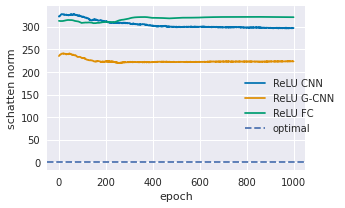

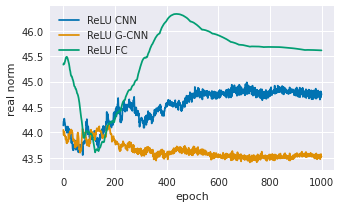

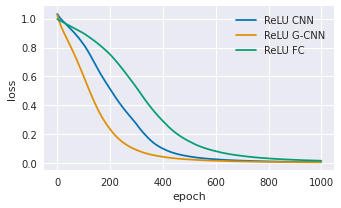

CPU times: user 5min 15s, sys: 12min 47s, total: 18min 2s
Wall time: 3min 29s


In [6]:
%%time
experiment_name = "relu_d60_gaussian_10_sep"
group = Group('D60')
k = 10
ins_m = torch.randn([k, 60])
ins_p = torch.randn([k, 60])
ins = torch.cat([ins_m, ins_p])
outs_p = torch.Tensor([[-1]] * k)
outs_m = torch.Tensor([[1]] * k)
outs = torch.cat([outs_m, outs_p])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
N = 3 # average over trajectories
force_train = True

nets = {"ReLU CNN": relu_conv_net, "ReLU G-CNN": relu_g_net, "ReLU FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=1000, cuda=False, dfs=dfs,
                                       exp_name=experiment_name,
                                       lr=5e-3)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)